Skipping category '.ipynb_checkpoints' due to insufficient images.
Found 1512 images belonging to 7 classes.
Found 507 images belonging to 7 classes.
Found 508 images belonging to 7 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,764,295 (60.14 MB)

 Trainable params: 1,049,607 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

C:\Users\Ansh Patel\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 539s 12s/step - accuracy: 0.2930 - loss: 1.9055 - val_accuracy: 0.5729 - val_loss: 1.2390
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 5:07 7s/step - accuracy: 0.4375 - loss: 1.4145

C:\Users\Ansh Patel\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.4375 - loss: 1.4145 - val_accuracy: 0.5771 - val_loss: 1.2306
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 432s 9s/step - accuracy: 0.4687 - loss: 1.3414 - val_accuracy: 0.6313 - val_loss: 1.0214
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.3750 - loss: 1.4121 - val_accuracy: 0.6562 - val_loss: 1.0119
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 463s 10s/step - accuracy: 0.5303 - loss: 1.2209 - val_accuracy: 0.6542 - val_loss: 0.9905
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.5625 - loss: 1.1157 - val_accuracy: 0.6771 - val_loss: 0.9651
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 445s 9s/step - accuracy: 0.5695 - loss: 1.0924 - val_accuracy: 0.6854 - val_loss: 0.9246
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.5312 - loss: 1.1408 - val_accuracy: 0.6833 - val_loss: 0.9270
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 446s 10s/step - accuracy: 0.5487 - loss: 1.1242 - val_accuracy: 0.6938 - val_loss: 

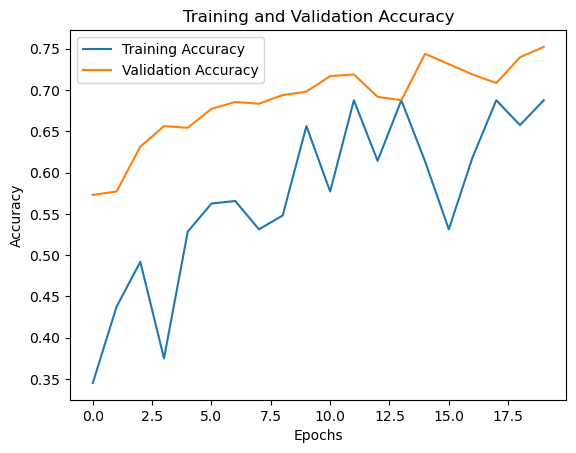

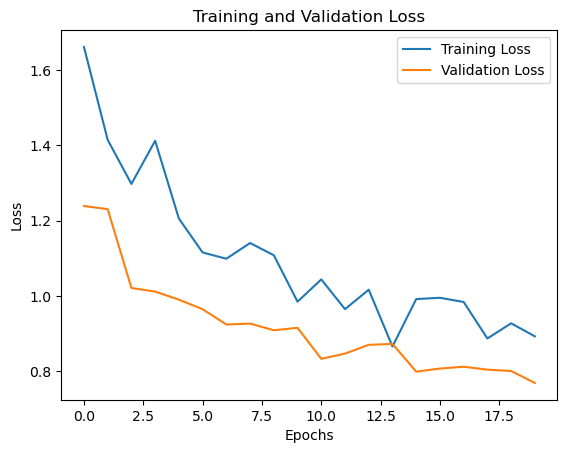

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths for original dataset and new folders
data_dir = 'waste_data'  # The original folder containing the category subfolders
base_dir = 'processed_waste_data'

# Create directories for train, val, and test
os.makedirs(base_dir, exist_ok=True)
for split in ['train', 'val', 'test']:
    for category in os.listdir(data_dir):
        os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)

# Split data for each category
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    images = os.listdir(category_path)

    if len(images) < 4:  # Minimum number of images to split into train, val, and test
        print(f"Skipping category '{category}' due to insufficient images.")
        continue

    # Split into train, test, and val sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_images, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    for image_set, split in [(train_images, 'train'), (val_images, 'val'), (test_images, 'test')]:
        for image in image_set:
            src_path = os.path.join(category_path, image)
            dest_path = os.path.join(base_dir, split, category, image)
            shutil.copyfile(src_path, dest_path)

# Image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle test data for accurate performance evaluation
)

# Load the VGG16 model pre-trained on ImageNet (excluding the fully connected top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze all convolutional layers to retain pre-trained features
base_model.trainable = False

# Define the custom model on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
epochs = 20

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
